In [1]:
import seaborn as sns
import pandas as pd

In [3]:
table = pd.read_excel('ALL_WGD_TABLE.xlsx')

In [7]:
table['WGD'] = table['Genome_doublings']>=1

In [12]:
from collections import Counter

In [16]:
Type_dict = Counter(table['Type'].values)

In [20]:
import numpy as np
a = []
b = []
ctype = []
for cancer in Type_dict.keys():
    c_t = table[table['Type']==cancer]
    a.append(np.sum(c_t['WGD'].values==1))
    b.append(len(c_t)-a[-1])
    ctype.append(cancer)

In [23]:
df = pd.DataFrame({'Type':ctype,'a':a,'b':b})

In [25]:
from scipy.stats import beta

In [30]:
means = beta.mean(a=df['a'].values,b=df['b'].values)
cis = beta.interval(0.95,a=df['a'].values,b=df['b'].values)

In [38]:
order = np.argsort(means)
cs = [ctype[o] for o in order]

In [74]:
chosen_cancers = ['COAD', 'BRCA', 'READ', 'LUSC', 'BLCA', 'LUAD', 'STAD', 'HNSC','UCEC', 'LIHC', 'KIRC']
colors = []
for c in cs:
    if c in chosen_cancers:
        colors.append([255, 64, 0])
    else: 
        colors.append([0, 128, 255])

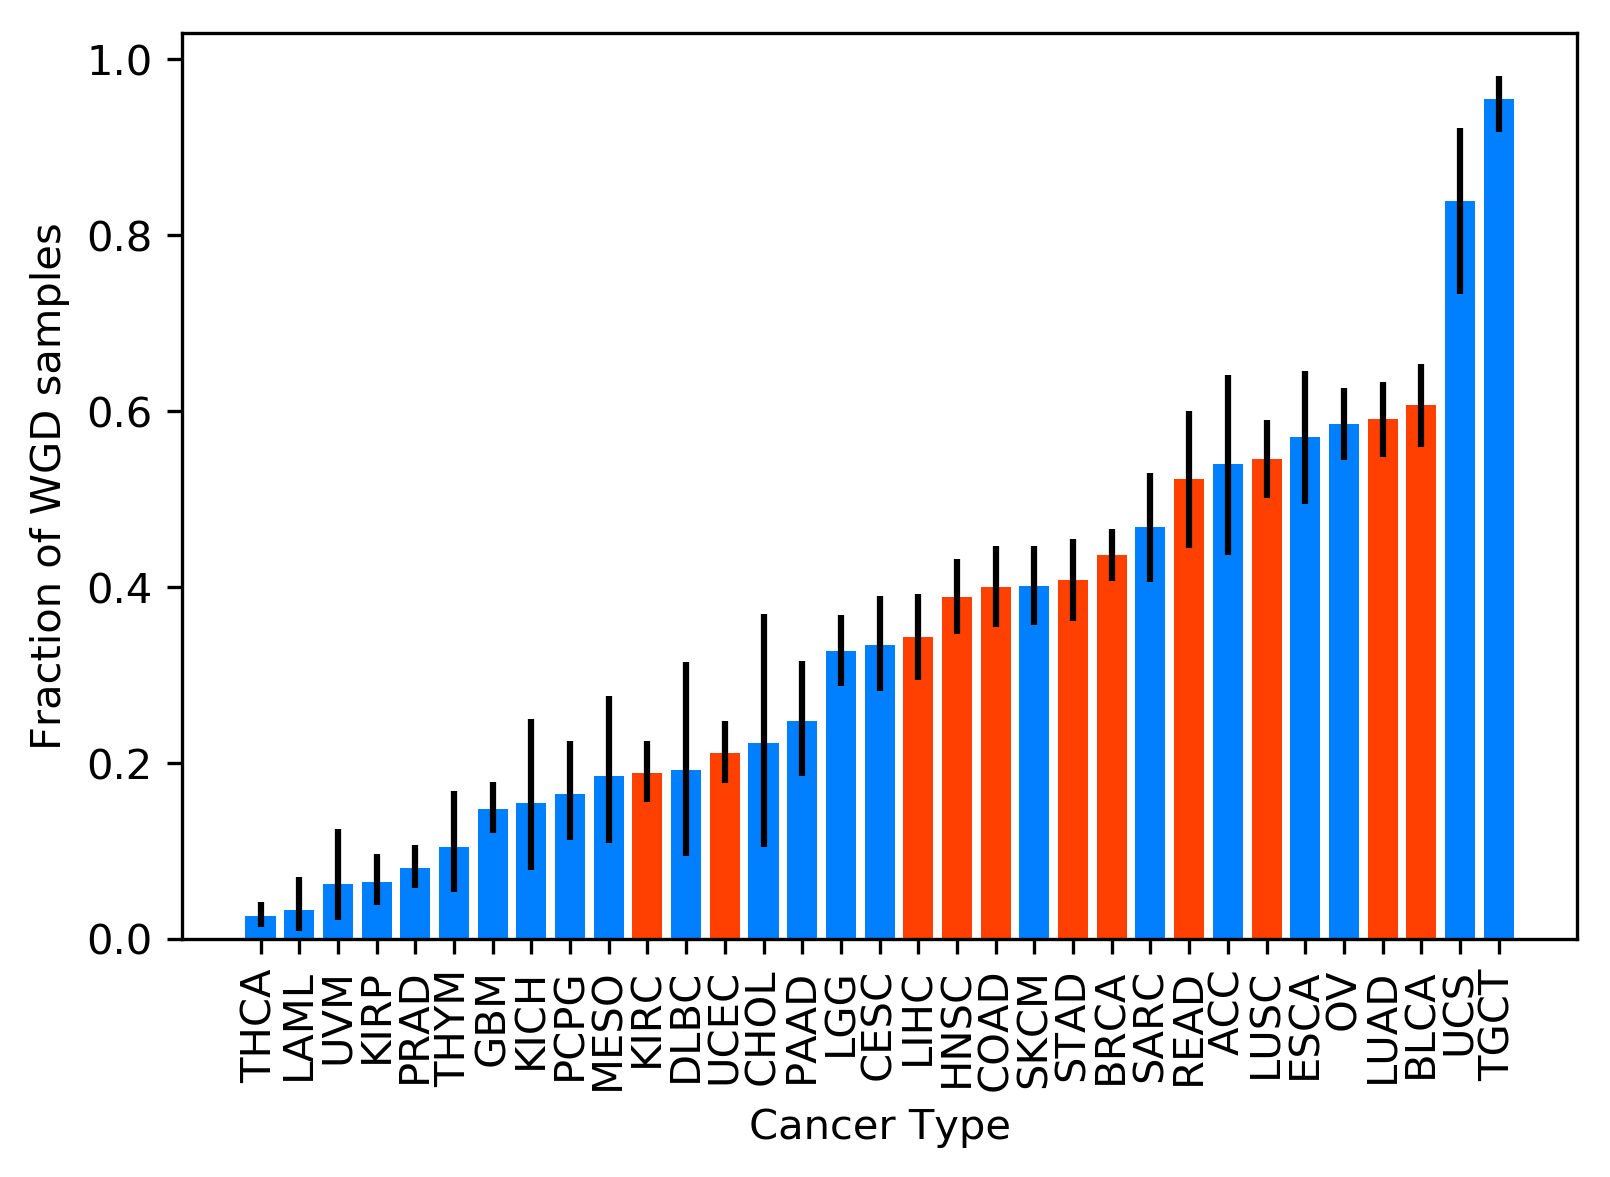

In [79]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)

yerr = np.stack([means[order] - np.stack(cis)[0,order],  np.stack(cis)[1,order]-means[order]])
ax.bar(x=np.linspace(0,len(ctype),len(ctype)),height=means[order],yerr=yerr,color=np.stack(colors)/255)
plt.xticks(np.linspace(0,len(ctype),len(ctype)),rotation=90)
ax.set_xticklabels(cs)
fig.set_dpi(300)
plt.ylabel('Fraction of WGD samples')
plt.xlabel('Cancer Type')
fig.savefig('WGD_by_cancer_type.png')

In [70]:
ctype

['LUSC',
 'PCPG',
 'THCA',
 'DLBC',
 'THYM',
 'UCS',
 'KIRC',
 'MESO',
 'PAAD',
 'CESC',
 'LGG',
 'TGCT',
 'OV',
 'ACC',
 'STAD',
 'KIRP',
 'KICH',
 'HNSC',
 'READ',
 'SARC',
 'LIHC',
 'SKCM',
 'UVM',
 'UCEC',
 'ESCA',
 'LUAD',
 'LAML',
 'BRCA',
 'COAD',
 'GBM',
 'PRAD',
 'BLCA',
 'CHOL']

array([[  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [255,  64,   0],
       [  0, 128, 255],
       [255,  64,   0],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [  0, 128, 255],
       [255,  64,   0],
       [255,  64,   0],
       [255,  64,   0],
       [  0, 128, 255],
       [255,  64,   0],
       [255,  64,   0],
       [  0, 128, 255],
       [255,  64,   0],
       [  0, 128, 255],
       [255,  64,   0],
       [  0, 128, 255],
       [  0, 128, 255],
       [255,  64,   0],
       [255,  64,   0],
       [  0, 128, 255],
       [  0, 128, 255]])